# The National Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The National Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway.  The goal of the test is to evaluate students’ level of knowledge regarding the curriculum taught at higher education institutions, regardless of what they have learned in secondary school. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2023, designed to effectivly convey the findings of the test. The (static) written report can be found here: https://programmeringstesten.no/ 

### Imports

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [293]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious institutions with standardized labels: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
Rename columns with simpler titles. Easier to use in analysis.
Removed all institutions that are not in: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Removed false entries
Removed blank submissions: 57
Max score: 22.599999999999998
Submissions to be graded: 2030
Submissions graded.


### Dataset

In [294]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [295]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', ' '
#df = df[(df['Institution'].isin(specific_institutions))]

In [296]:
# Filter by Graduate Year
specific_graduateyears = ['Før 2020', '2020', '2021 - 2022', '2023'] # 'Før 2020', '2020', '2021 - 2022', '2023'
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [297]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [298]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1766 student submissions.



### Institutions

Institution
NTNU          694
UiB           323
              272
NMBU          202
UiS           107
UiO            60
Kristiania     55
HvL            53
Name: count, dtype: int64


<Axes: ylabel='count'>

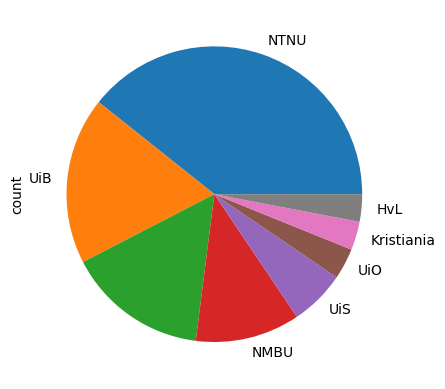

In [299]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2021 - 2022    800
2023           483
Før 2020       338
2020           142
Name: count, dtype: int64


<Axes: ylabel='count'>

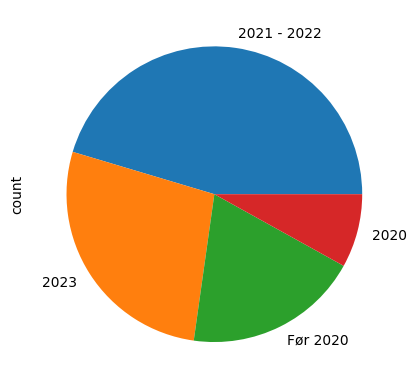

In [300]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    986
f    641
     139
Name: count, dtype: int64
Gender
m    0.558324
f    0.362967
     0.078709
Name: proportion, dtype: float64


<Axes: ylabel='count'>

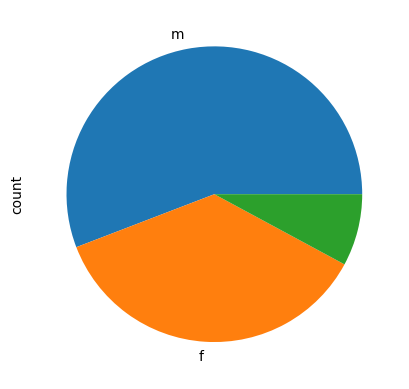

In [301]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [302]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

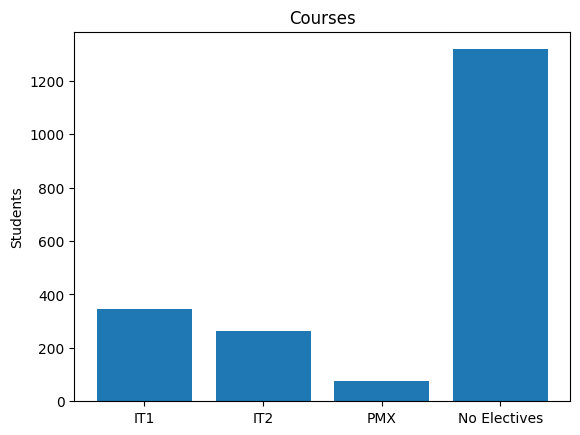

In [303]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

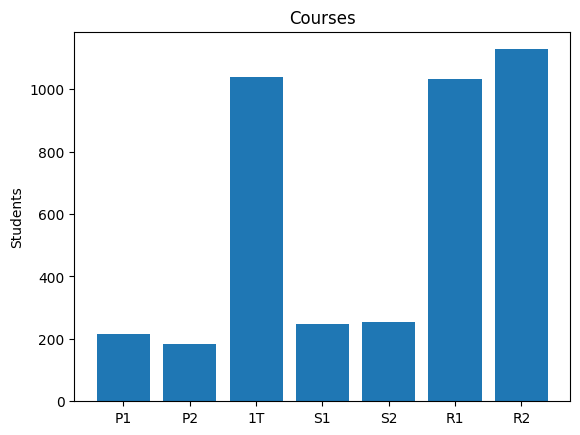

In [304]:
fig, ax = plt.subplots()

courses = ['P1', 'P2', '1T', 'S1', 'S2', 'R1', 'R2']
n_p1 = df['P1'].value_counts()['1P']
n_p2 = df['P2'].value_counts()['2P']
n_1t = df['T1'].value_counts()['1T']
n_s1 = df['S1'].value_counts()['S1']
n_s2 = df['S2'].value_counts()['S2']
n_r1 = df['R1'].value_counts()['R1']
n_r2 = df['R2'].value_counts()['R2']
counts = [n_p1, n_p2, n_1t, n_s1, n_s2, n_r1, n_r2]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    1436
Ja      325
Name: count, dtype: int64
OutsideExperience
Nei    0.815446
Ja     0.184554
Name: proportion, dtype: float64


<Axes: ylabel='count'>

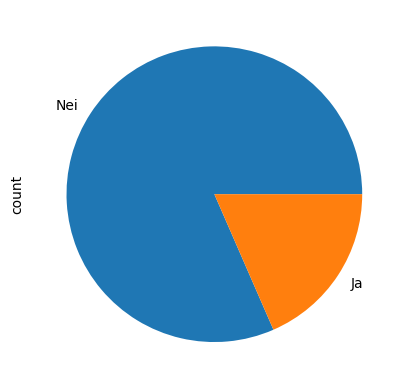

In [305]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [306]:
# Configurations
bins = 23
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 22.6.

Mean: 10.541
Standard deviation: 5.986


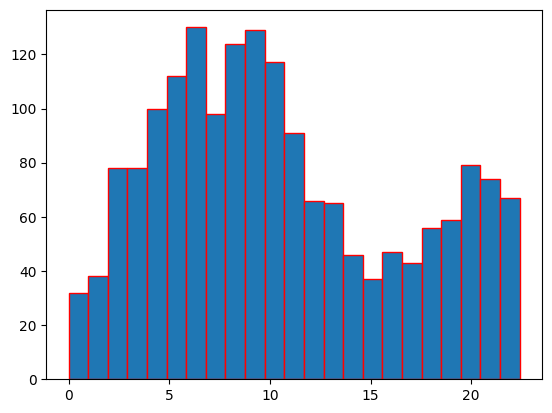

In [307]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins)
plt.show() 

In [308]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x))
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023: 14.38
Standard deviation of 2023: 5.434

Mean of before 2023: 9.093
Standard deviation of before 2023: 5.525


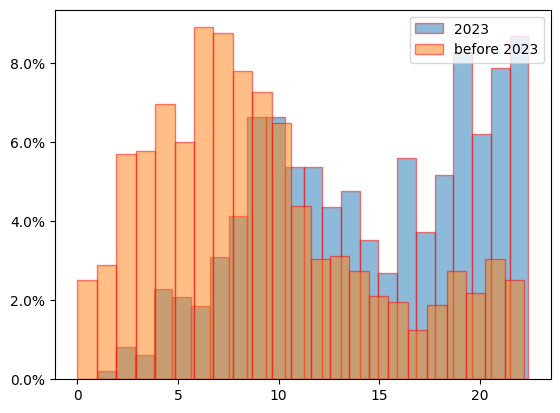

In [309]:
x = df[(df['GraduateYear'] == '2023')]['Total']
y = df[(df['GraduateYear'].isin(['Før 2020', '2020', '2021 - 2022']))]['Total']

x_label = '2023'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

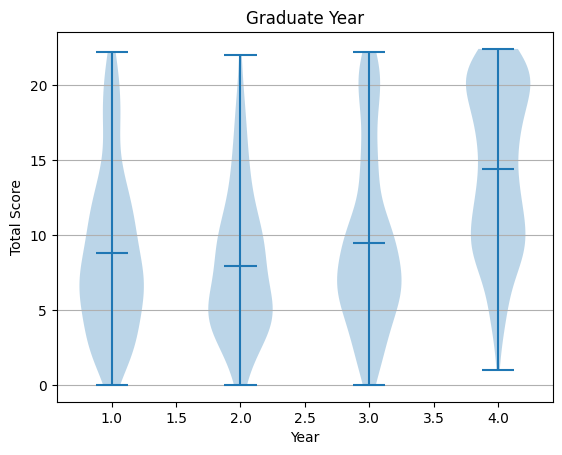

In [310]:
fig, axes = plt.subplots()

axes.violinplot(dataset = [df[df.GraduateYear == 'Før 2020']["Total"].values,
                           df[df.GraduateYear == '2020']["Total"].values,
                           df[df.GraduateYear == '2021 - 2022']["Total"].values,
                           df[df.GraduateYear == '2023']["Total"].values],
                           
                           showmeans=True)

axes.set_title('Graduate Year')
axes.yaxis.grid(True)
axes.set_xlabel('Year')
axes.set_ylabel('Total Score')

plt.show()

### Gender

Mean of women: 8.394
Standard deviation of women: 5.03

Mean of men: 11.708
Standard deviation of men: 6.102


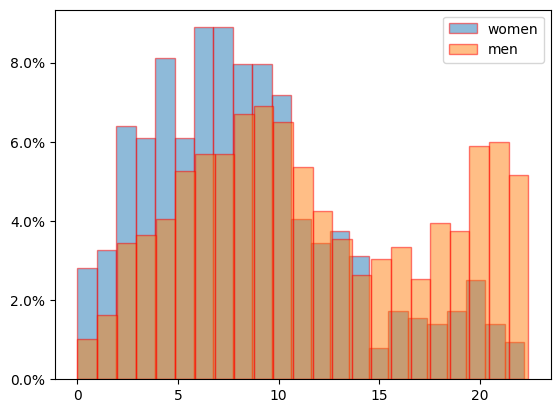

In [311]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Compare two groups

Mean of UiB: 9.843
Standard deviation of UiB: 5.308

Mean of UiO: 13.293
Standard deviation of UiO: 5.804


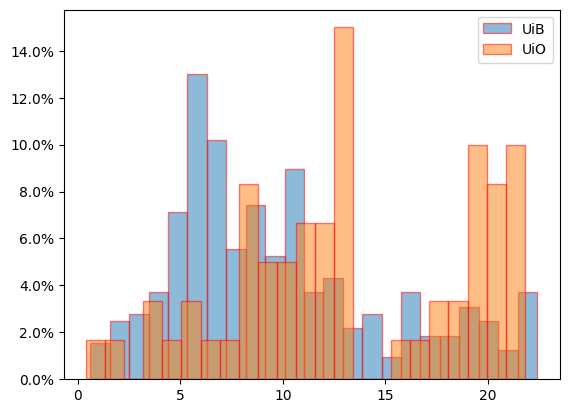

In [312]:
# Select which student groups you want to compare
x = df[(df['Institution'] == 'UiB')]['Total']
y = df[(df['Institution'] == 'UiO')]['Total']

# Change lables as desired
x_label = 'UiB'
y_label = 'UiO'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [313]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [337]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['a', 'b', 'c', 'd', 'a + d', 'c == 10.3', 'a + a', '[a]', 'b * c', 'a * b', 'a + b\"\"']
correctnes_rate(datatype_columns, "Datatypes", task_weight=0.2)

# Booleans
boolean_columns = ["100 == 100", "42 != 25", "not (100 == 100)", "(10*2) > 9", "100 >= 100", "99 >= 100", "100 != (50*2)", "(14/2) > 7 ", "(5 < 7) and (4 > 5)", "(3 < 7) and (7 < 9)", "(5 < 7) or (4 > 5)", "and 500 == 100", "(False != False) == (True != True)", "(not True) or False", "False (not False)", "True and False", "True and (False or True)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1", "Variables2"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       39.43 %
Booleans        55.22 %
Variables       83.21 %
Conditionals    64.16 %
Loops           30.10 %
Lists           26.86 %
Functions       39.93 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [338]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    print(df[task_column].value_counts()[:n_answers])

## Datatypes
<img src="images/datatypes_variables.png" alt="drawing" width="100"/>

Select the correct datatype that each variable has.

<img src="images/datatypes_variable_tasks.png" alt="drawing" width="600"/>

In [316]:
print_task_result("a", df, 6, True)
print()
print_task_result("b", df, 6, True)
print()
print_task_result("c", df, 6, True)
print()
print_task_result("d", df, 6, True)

Number of correct responses:
a_points
0.0    953
0.2    813
Name: count, dtype: int64

Top 6 most common answers:
a
str      813
Error    203
list     154
float    147
int      147
bool     113
Name: count, dtype: int64

Number of correct responses:
b_points
0.0    973
0.2    793
Name: count, dtype: int64

Top 6 most common answers:
b
int      793
Error    212
str      202
float    160
bool     106
list     103
Name: count, dtype: int64

Number of correct responses:
c_points
0.2    1236
0.0     530
Name: count, dtype: int64

Top 6 most common answers:
c
list     1236
int        87
float      80
str        69
bool       61
Error      60
Name: count, dtype: int64

Number of correct responses:
d_points
0.0    951
0.2    815
Name: count, dtype: int64

Top 6 most common answers:
d
float    815
str      247
int      190
Error    152
bool     123
list      47
Name: count, dtype: int64


<img src="images/datatypes_variables.png" alt="drawing" width="100"/>

Select the correct datatype for each expression.

<img src="images/datatypes_expressions_tasks.png" alt="drawing" width="600"/>

In [317]:
print_task_result("a + d", df, 6, True)
print()
print_task_result("c == 10.3", df, 6, True)
print()
print_task_result("a + a", df, 6, True)
print()
print_task_result("[a]", df, 6, True)
print()
print_task_result("b * c", df, 6, True)
print()
print_task_result("a * b", df, 6, True)
print()
print_task_result("a + b\"\"", df, 6, True)

Number of correct responses:
a + d_points
0.2    959
0.0    807
Name: count, dtype: int64

Top 6 most common answers:
a + d
Error    959
str      139
float    129
bool     122
int       96
list      78
Name: count, dtype: int64

Number of correct responses:
c == 10.3_points
0.0    1342
0.2     424
Name: count, dtype: int64

Top 6 most common answers:
c == 10.3
Error    661
bool     424
float    173
int      108
str       96
list      66
Name: count, dtype: int64

Number of correct responses:
a + a_points
0.0    1115
0.2     651
Name: count, dtype: int64

Top 6 most common answers:
a + a
str      651
Error    302
list     146
bool     146
int      143
float    119
Name: count, dtype: int64

Number of correct responses:
[a]_points
0.0    1135
0.2     631
Name: count, dtype: int64

Top 6 most common answers:
[a]
list     631
Error    305
bool     156
str      151
float    124
int      123
Name: count, dtype: int64

Number of correct responses:
b * c_points
0.0    1269
0.2     497
Name: co

## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

<img src="images/Booleans1.png" alt="drawing" width="300"/>

In [318]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("42 != 25", df, 3, False)
print()
print_task_result("not (100 == 100)", df, 3, False)
print()
print_task_result("(10*2) > 9", df, 3, False)
print()
print_task_result("100 >= 100", df, 3, False)
print()
print_task_result("99 >= 100", df, 3, False)

Top 3 most common answers:
100 == 100
True     1510
Error      91
False      60
Name: count, dtype: int64

Top 3 most common answers:
42 != 25
True     662
False    551
Error    421
Name: count, dtype: int64

Top 3 most common answers:
not (100 == 100)
False    759
Error    743
True     122
Name: count, dtype: int64

Top 3 most common answers:
(10*2) > 9
True     1480
False      92
Error      82
Name: count, dtype: int64

Top 3 most common answers:
100 >= 100
True     1010
False     359
Error     275
Name: count, dtype: int64

Top 3 most common answers:
99 >= 100
False    1381
Error     154
True      119
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

<img src="images/Booleans2.png" alt="drawing" width="300"/>

In [319]:
print_task_result("100 != (50*2)", df, 3, False)
print()
print_task_result("(14/2) > 7 ", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("and 500 == 100", df, 3, False)

Top 3 most common answers:
100 != (50*2)
False    1016
True      318
Error     274
Name: count, dtype: int64

Top 3 most common answers:
(14/2) > 7 
False    1403
True      118
Error     113
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False    1284
Error     242
True       98
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True     1484
Error      77
False      56
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True     675
False    582
Error    358
Name: count, dtype: int64

Top 3 most common answers:
and 500 == 100
Error    911
False    635
True      71
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

<img src="images/Booleans3.png" alt="drawing" width="300"/>

In [320]:
print_task_result("(False != False) == (True != True)", df, 3, False)
print()
print_task_result("(not True) or False", df, 3, False)
print()
print_task_result("False (not False)", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True and (False or True)", df, 3, False)

Top 3 most common answers:
(False != False) == (True != True)
True     761
Error    530
False    247
Name: count, dtype: int64

Top 3 most common answers:
(not True) or False
True     562
False    506
Error    456
Name: count, dtype: int64

Top 3 most common answers:
False (not False)
Error    824
False    460
True     224
Name: count, dtype: int64

Top 3 most common answers:
True and False
Error    715
True     419
False    382
Name: count, dtype: int64

Top 3 most common answers:
True and (False or True)
Error    648
True     642
False    220
Name: count, dtype: int64


## Variables

### Variables 1
What does this code snippet print?

![Variables1](images/Variables1.png)

In [321]:
print_task_result("Variables1", df)

Number of correct responses:
Variables1_points
1    1631
0     135
Name: count, dtype: int64

Top 5 most common answers:
Variables1
8     1631
53      17
7        8
3        8
0        6
Name: count, dtype: int64


### Variables 2

What does this code snippet print?

<img src="images/Variables2.png" alt="drawing" width="200"/>


In [322]:
print_task_result("Variables2", df)

Number of correct responses:
Variables2_points
1    1308
0     458
Name: count, dtype: int64

Top 5 most common answers:
Variables2
21    1308
26     157
16      83
5       13
19      11
Name: count, dtype: int64


## Conditionals

### Conditionals 1

What does this code snippet print?

<img src="images/Conditionals1.png" alt="drawing" width="200"/>

In [323]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1159
0     607
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Second    976
second    182
2          79
First      72
3          35
Name: count, dtype: int64


### Conditionals 2

What must be placed at the red line such that 15 is printed?

<img src="images/Conditionals2.png" alt="drawing" width="200"/>

In [324]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
1    1028
0     738
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
!=     1028
not     313
==      172
<       140
Name: count, dtype: int64


### Conditionals 3

What does this code snippet print?

<img src="images/Conditionals3.png" alt="drawing" width="200"/>

In [325]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    1212
0     554
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
15    1212
5      153
13      48
1       13
12      12
Name: count, dtype: int64


## Loops

### Loops 1

What does this code snippet print?

<img src="images/Loops1.png" alt="drawing" width="200"/>

In [326]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1214
1     552
Name: count, dtype: int64

Top 5 most common answers:
Loops1
21    552
0     283
1     138
5      83
6      83
Name: count, dtype: int64


### Loops 2

What does this code snippet print?

<img src="images/Loops2.png" alt="drawing" width="200"/>

In [327]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1255
1     511
Name: count, dtype: int64

Top 5 most common answers:
Loops2
6    511
2    444
0    124
4    113
3     73
Name: count, dtype: int64


## Lists

### Lists 1

What does this code snippet print?

<img src="images/Lists1.png" alt="drawing" width="200"/>

In [328]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1203
1     563
Name: count, dtype: int64

Top 5 most common answers:
Lists1
-3    637
4     563
3      80
0      62
1      18
Name: count, dtype: int64


### Lists 2

What does this code snippet print?

<img src="images/Lists2.png" alt="drawing" width="200"/>

In [329]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1240
1     526
Name: count, dtype: int64

Top 5 most common answers:
Lists2
101    666
102    526
1       79
100     36
105     22
Name: count, dtype: int64


### Lists 3

What does this code snippet print?

<img src="images/Lists3.png" alt="drawing" width="200"/>

In [330]:
print_task_result("Lists3", df)

Number of correct responses:
Lists3_points
0    1432
1     334
Name: count, dtype: int64

Top 5 most common answers:
Lists3
-10    334
4      288
8      193
-5      68
0       60
Name: count, dtype: int64


## Functions

### Functions 1

What does this code snippet print?

<img src="images/Functions1.png" alt="drawing" width="200"/>

In [331]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
1    1174
0     592
Name: count, dtype: int64

Top 5 most common answers:
Functions1
13     1174
1        24
0        24
6,7      22
7        12
Name: count, dtype: int64


### Functions 2

What does this code snippet print?

<img src="images/Functions2.png" alt="drawing" width="200"/>

In [332]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1104
1     662
Name: count, dtype: int64

Top 5 most common answers:
Functions2
100     662
42      337
4200     83
58       34
0        33
Name: count, dtype: int64


### Functions 3

What code must be written on line 5 so that the function returns the smallest number of the given list?

<img src="images/Functions3.png" alt="drawing" width="200"/>

In [333]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1176
1     590
Name: count, dtype: int64

Top 5 most common answers:
Functions3
min_number = number    590
number = min_number    367
break                  223
continue               221
Name: count, dtype: int64


### Functions 4

What does this code snippet print?

<img src="images/Functions4.png" alt="drawing" width="200"/>

In [334]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    1108
1     658
Name: count, dtype: int64

Top 5 most common answers:
Functions4
7     658
5     129
9     118
3      55
10     42
Name: count, dtype: int64


### Functions 5

What does this code snippet print?

<img src="images/Functions5.png" alt="drawing" width="200"/>

In [335]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    1127
1     639
Name: count, dtype: int64

Top 5 most common answers:
Functions5
7    639
3    121
6    112
8     95
5     66
Name: count, dtype: int64


### Functions 6

What does this code snippet print?

<img src="images/Functions6.png" alt="drawing" width="200"/>

In [336]:
print_task_result("Functions6", df, df_tasks)

Number of correct responses:
Functions6_points
0    1258
1     508
Name: count, dtype: int64

Top 5 most common answers:
Functions6
10    508
9     113
5      77
8      69
7      56
Name: count, dtype: int64
